<center>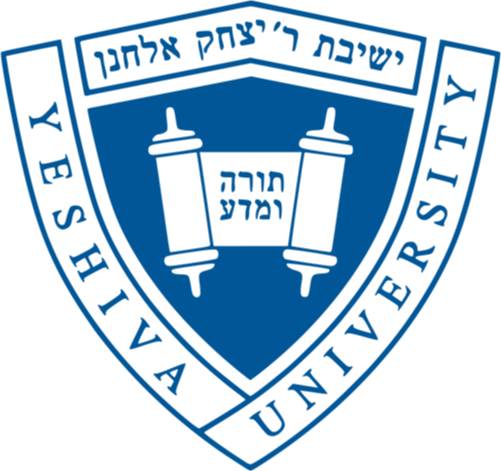</center>

# <center>Katz School of Science and Health<br>AIM 5001 Data Acquisition & Management<br><br>AIM 5001 M8 Assignment</center>
<br><br>

### <center>Radek Jan Holik</center>
<!-- ### <center>Jatin Kayasth</center> -->

# **Part 1:**
**Data Summary (5 Points)** – Explain how many use cases your data set provides; how many attributes are in each use case; what the data types are for each of the attributes; etc. Be sure include any Python code used as part of your Data Summary work.

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 120)

import warnings
warnings.filterwarnings("ignore")

#### Loding Data

In [2]:
# The file path to my online AIM 5001 Github Repository with the "diamonds.csv" file
filePath = r'https://raw.githubusercontent.com/rjholik/AIM-5001-Data-Acquisition-Management/main/Module%2008/diamonds.csv'
df = pd.read_csv(filePath, index_col=0)

### Data Understanding

In [3]:
# Dataframe shape
df.shape

(53940, 10)

#### <center>**The data includes 53,940 use cases/records.**</center>

In [4]:
 # Column names
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

#### <center>**Each recod contains 10 attributes.**</center>

### Dataset Glossary (Column-Wise):
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from D (best) to J (worst)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)
- price: price in US dollars (\$326--\$18,823)
- x: length in mm (0--10.74)
- y: width in mm (0--58.9)
- z: depth in mm (0--31.8)

### Data types

In [5]:
# Data types of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB
None


The Dtype column in the above shows the data type for each of the column. "Object" Dtype is categorical, "int64" and "float64" are numeric.

The following attributes/columns are categorical.
- cut
- color
- clarity

The rest of the attributes/columns are numerical.

### First 10 rows

In [6]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Missing/Invalid Data Values

In [7]:
# Checking for null values
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Duplicate values

In [8]:
# Check if any duplicate appears
df.loc[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1009,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2026,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47970,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49327,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49558,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50080,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


The data set has 146 duplicate values.

# **Part 2:**
**Exploratory Data Analysis (EDA) (40 Points)** – Provide summary statistics for each attribute; provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again using Seaborn. Include a narrative describing your EDA findings. Be sure include any Python code used as part of your EDA work.

### Summary Statistics

#### Unique Values

Unique values in those columns with categorical values.

In [9]:
for col in df[['cut','color','clarity']]:
  print(df[col].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Basic statistics

In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Boxplots for numerical attributes

Boxplots for the following numerical attributes are shown in this section.
- carat	
- depth
- table
- price	
- x
- y
- z

In [11]:
nameNumericColumns = list(df.select_dtypes([np.number]).columns)
print(nameNumericColumns)

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [12]:
units = ['[ct]','[%]','[%]','[$]','[mm]','[mm]','[mm]']

## Matplotlib Histograms & Boxplots

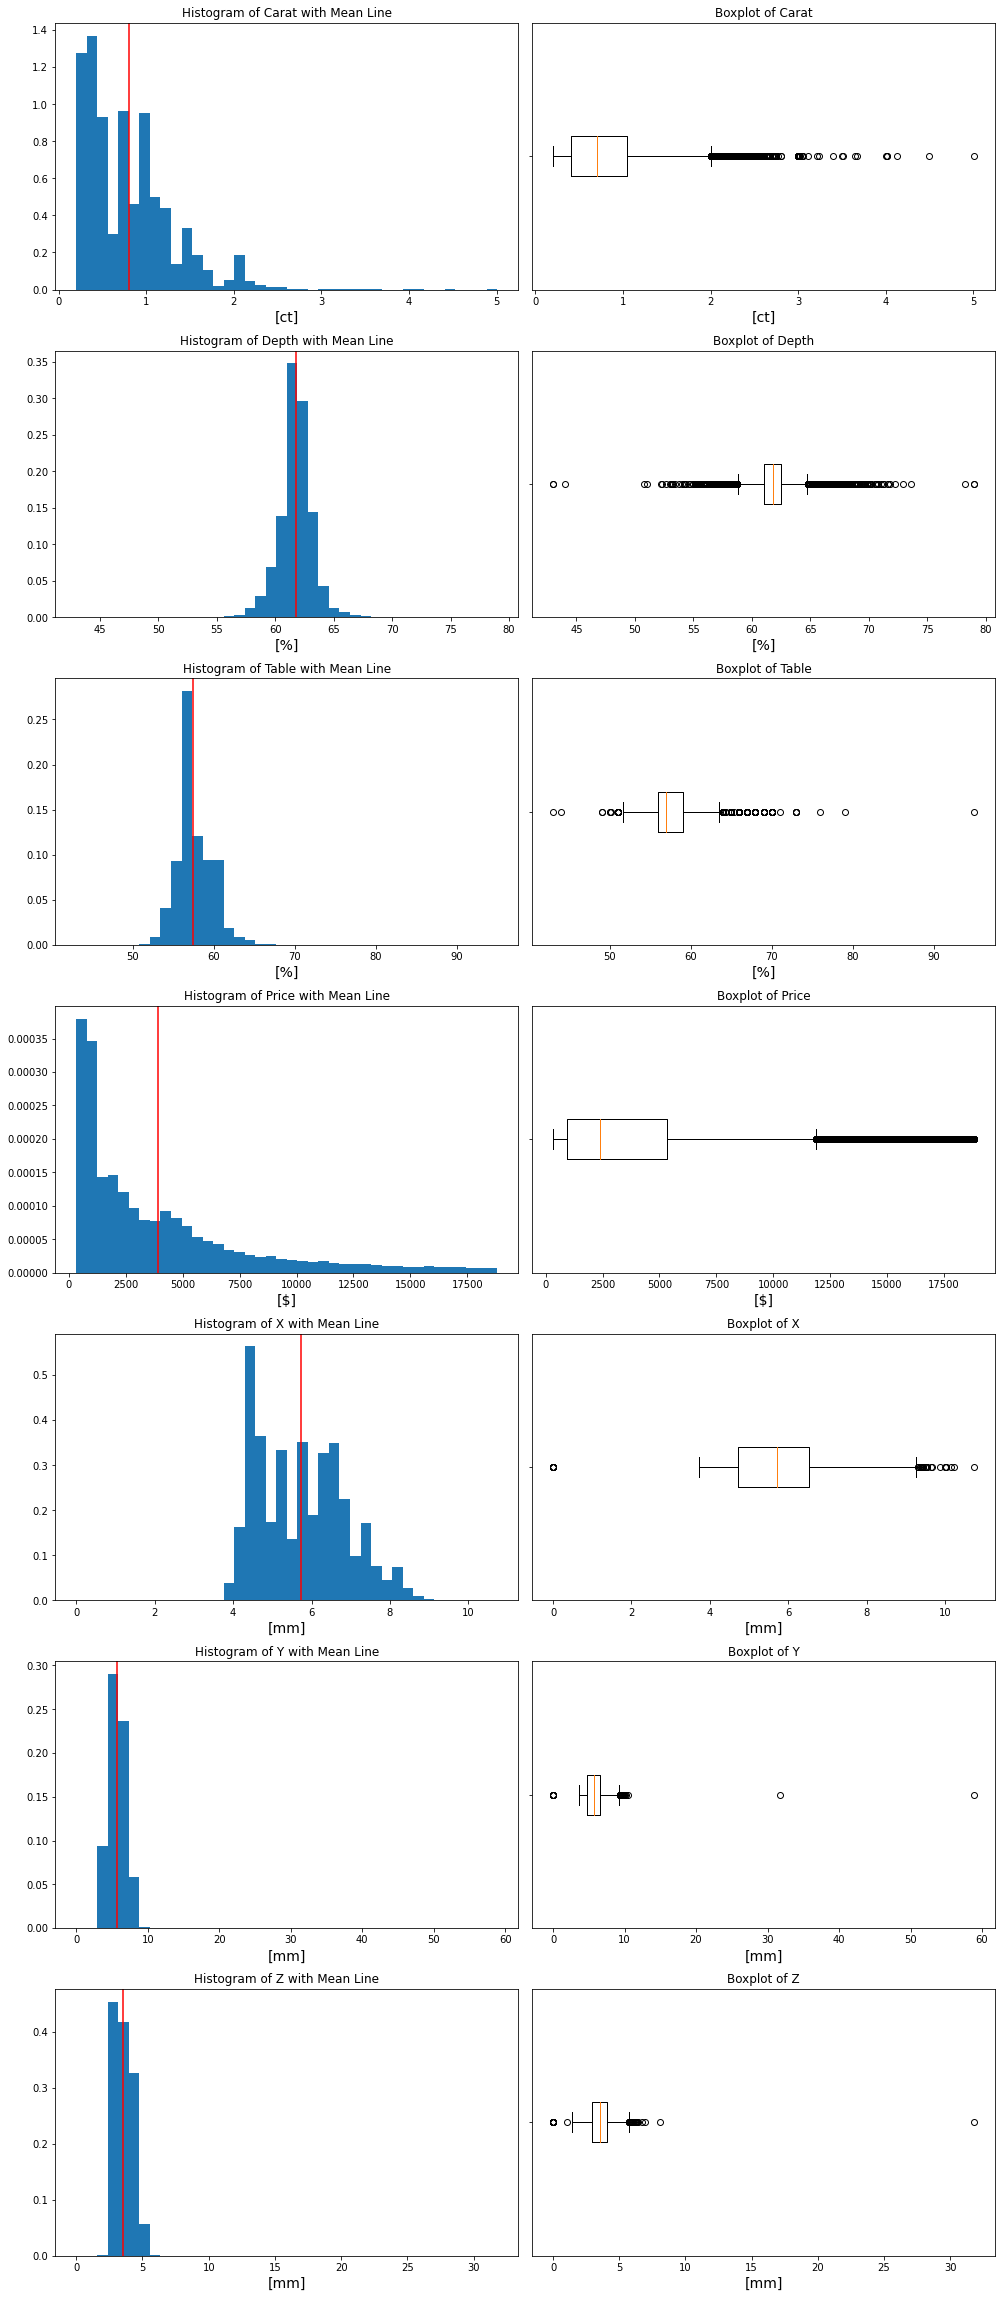

In [13]:
# figure size
plt.figure(figsize = (14, 32))
for idx, row in enumerate(nameNumericColumns):
    
    # Left side of figure
    plt.subplot(len(nameNumericColumns), 2, 2*idx + 1)
    plt.hist(df[row], bins=40, density=1)
    plt.axvline(x=df[row].mean(), color='red')
    plt.xlabel(units[idx], fontsize = 14)
    plt.title(f"Histogram of {row.title()} with Mean Line")

    # right side of figure
    plt.subplot(len(nameNumericColumns), 2, 2*idx + 2)
    plt.boxplot(df[row], vert = 0)
    plt.xlabel(units[idx], fontsize = 14)
    plt.title(f"Boxplot of {row.title()}")
    plt.yticks([1],[])

# using padding
plt.tight_layout(pad=1.0)
  
plt.show()

## Seaborn Histograms & Boxplots

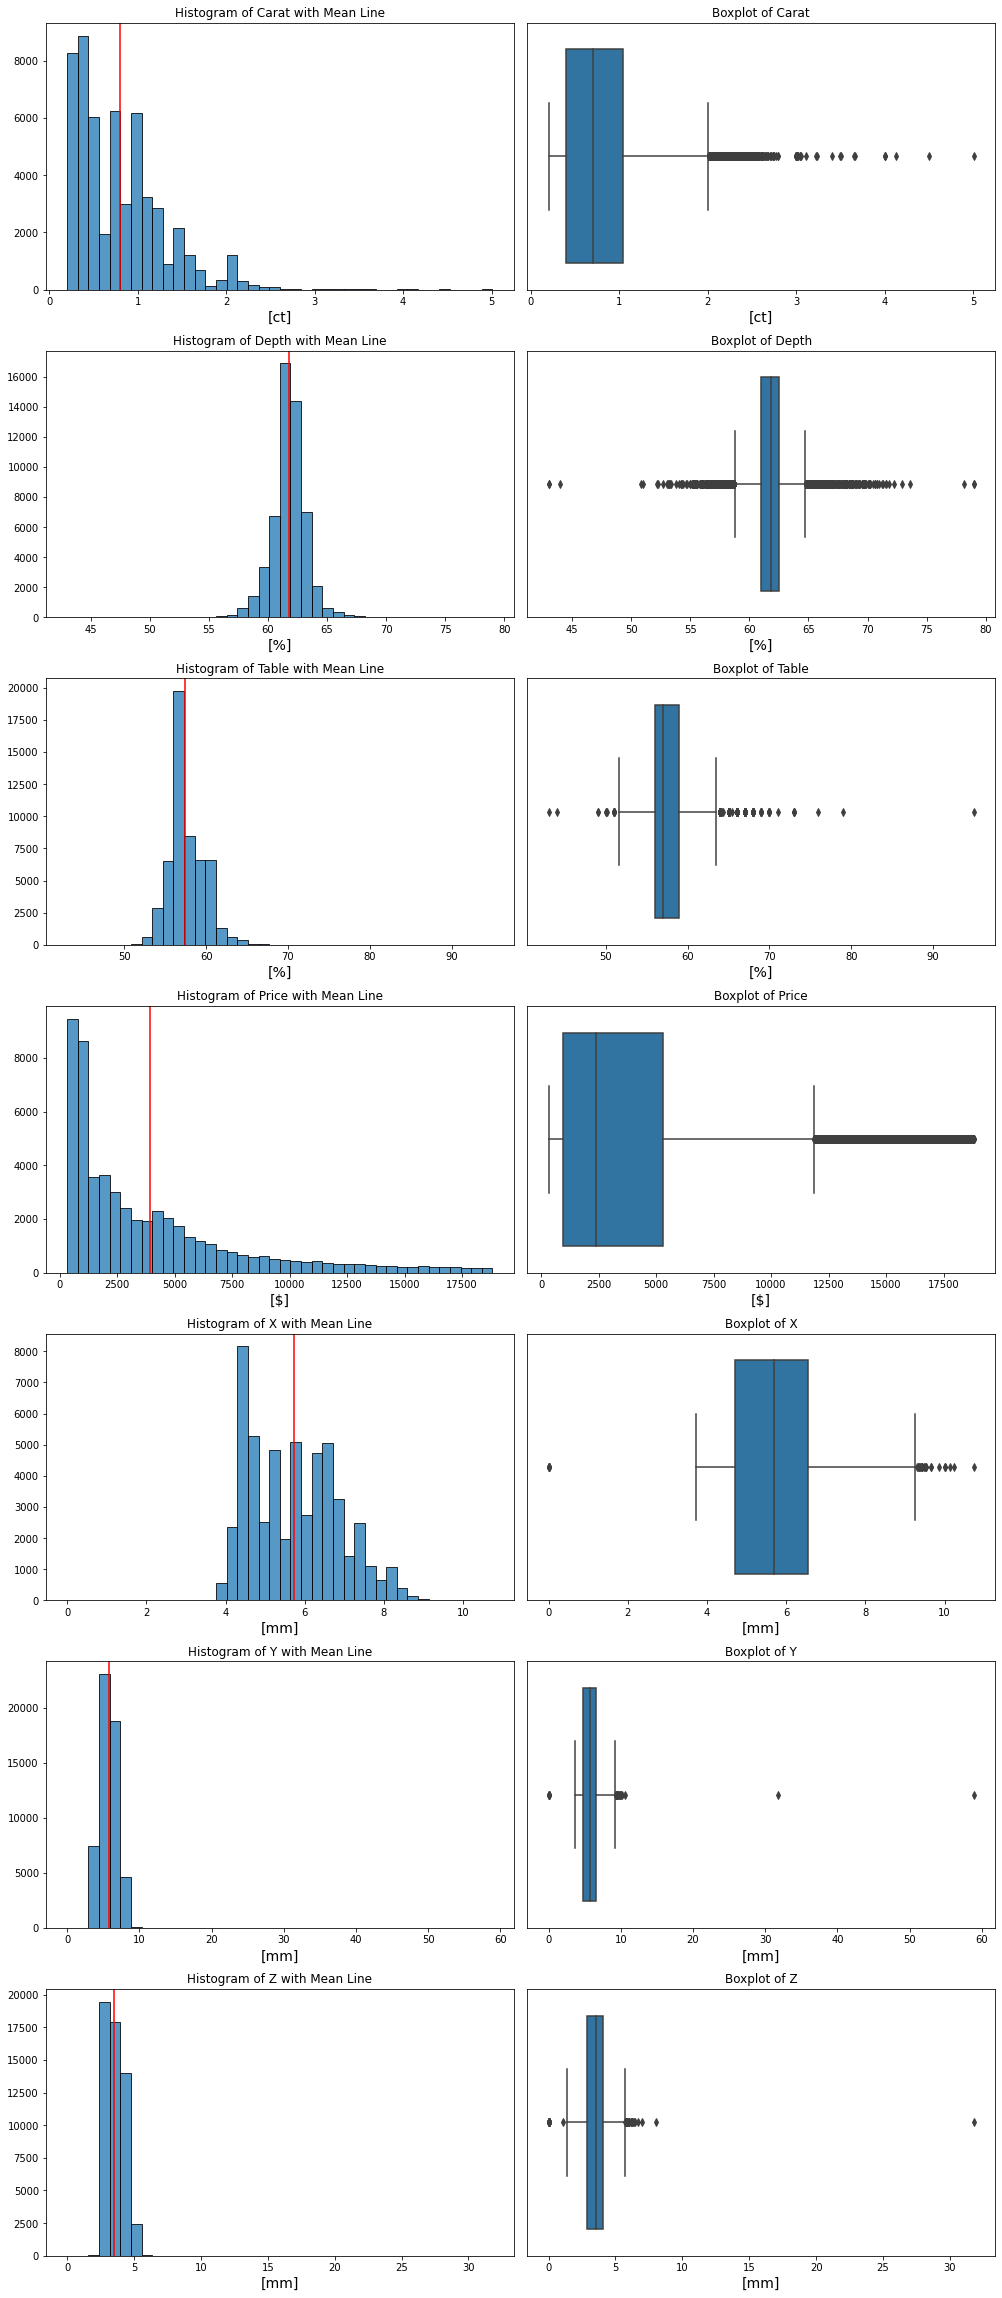

In [14]:
# figure size
from panel import Row


plt.figure(figsize = (14, 32))
for idx, row in enumerate(nameNumericColumns):
    
    # Left side of figure
    plt.subplot(7, 2, 2*idx + 1)
    sns.histplot(data = df[row], bins = 40)
    plt.xlabel(units[idx], fontsize = 14)
    plt.ylabel('')
    plt.axvline(x=df[row].mean(),color='red')
    plt.title(f"Histogram of {row.title()} with Mean Line")


    # right side of figure
    plt.subplot(7, 2, 2*idx + 2)
    sns.boxplot(df[row], dodge=False)
    plt.xlabel(units[idx], fontsize = 14)
    plt.title(f"Boxplot of {row.title()}")
    plt.yticks([1],[])

# using padding
plt.tight_layout(pad=1.0)
  
plt.show()

## Findings
- The distributions of diamond carat and price are mostly skewed with a downward trend.
- The distributions of diamond depth, table, x, y, and z are generally bell-shaped.
- The distributions of diamond carat and price have relatively a big variance.
- This stated fact is caused by a large number of outliers.

## Bar plots for categorical attributes

Bar plots for the following categorical attributes are shown in this section.
- cut
- color
- clarity

In [15]:
nameCategoricColumns = list(df.select_dtypes(["O"]).columns)
print(nameCategoricColumns)

['cut', 'color', 'clarity']


### Frequency of unique values in individual categorical attributes

In [16]:
for c in nameCategoricColumns:
    print(f"Attribut: {c}")
    print(df[c].value_counts())
    print()

Attribut: cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

Attribut: color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

Attribut: clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64



## Matplotlib Bar Plots

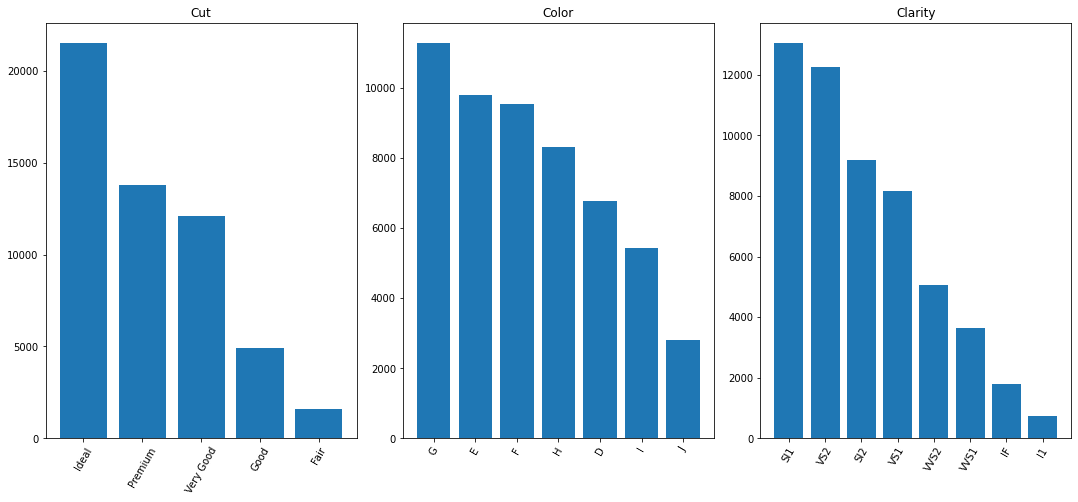

In [17]:
# figure size
plt.figure(figsize = (15, 7))
for idx, row in enumerate(nameCategoricColumns):
    
    plt.subplot(1, len(nameCategoricColumns), idx + 1)
    plt.bar(df[row].value_counts().index.tolist(), df[row].value_counts().tolist())
    plt.xticks(rotation = 60)
    plt.title(f"{row.title()}")

# using padding
plt.tight_layout(pad=0.8)
  
plt.show()

## Seaborn Bar Plots

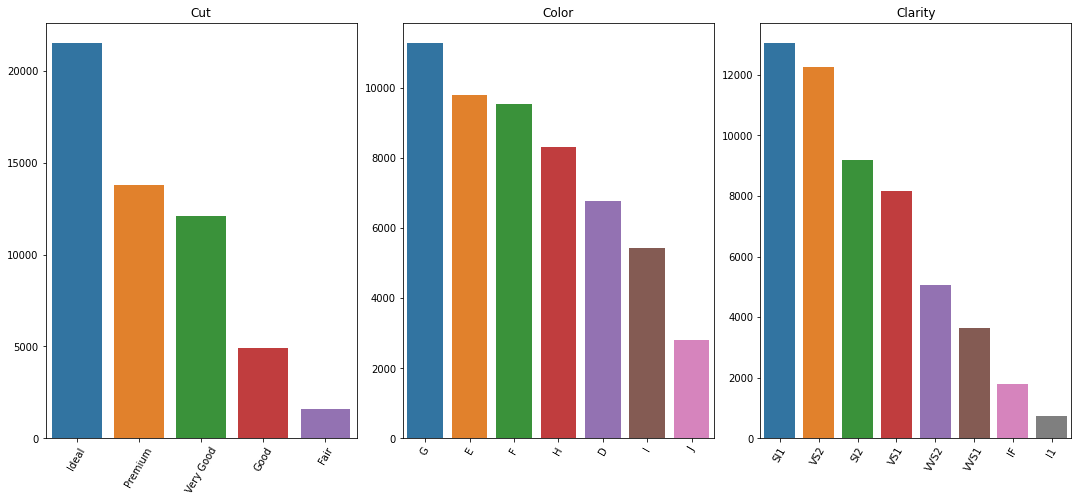

In [18]:
# figure size
plt.figure(figsize = (15, 7))
for idx, row in enumerate(nameCategoricColumns):
    
    # Left side of figure
    plt.subplot(1, len(nameCategoricColumns), idx + 1)
    sns.barplot(df[row].value_counts().index.tolist(), df[row].value_counts().tolist())
    plt.xticks(rotation = 60)
    plt.title(f"{row.title()}")

# using padding
plt.tight_layout(pad=0.8)
  
plt.show()

## Findings
- The most frequent cut of the diamonds is Ideal (scale: Fair (worst), Good, Very Good, Premium, Ideal (best)).
- The most frequent color of the diamonds is G (scale: J (worst), I, H, G, F, E, D (best)).
- The most frequent clarity of the diamonds is SI1 (scale: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).

## **Part 3:**
**Inferences (40 Points total)** – Perform whatever analysis is necessary to answer the following questions:

### **1.**
**(4 Points)** What proportion of diamonds are between .30 and 1.08 carats?

In [19]:
proportionCarats = df.query('carat >= 0.3 and carat <= 1.08').count() / df.count()
print(f"{round(proportionCarats[0], 4) * 100}%")

74.68%


#### <center>**The proportion of diamonds between 0.30 and 1.08 carats is 74.68%.**</center>

### **2.** 
**(4 Points)** How many of the diamonds have equal x and y dimensions?

In [20]:
xEqualsY = df.query('x == y').count()[0]
print(f"{xEqualsY}")

17


#### <center>**17 diamonds have the same x and y dimensions.**</center>

### **3.**
**(4 Points)** How many of the diamonds have a carat value that is less than the mean carat value?

In [21]:
meanCarat = df[['carat']].mean()
caratsLessMean = df.query('carat < @meanCarat[0]').count()[0]
print(caratsLessMean)

31127


#### <center>**31127 diamonds have a carat value that is less than the mean carat value.**</center>

### **4.**
**(4 Points)** How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: **Fair / Good / Very Good / Premium / Ideal**

In [22]:
premiumBetter = df.query("cut == 'Premium' or cut == 'Ideal'").count()[0]
print(premiumBetter)

35342


#### <center>**35342 diamonds have a Premium cut or better.**</center>

### **5.**
**(8 Points)** Which diamond has the highest price per carat? What is its value?

In [23]:
# The dataset gets a new column with the price per carat 
df['price_per_carat'] = df['price'] / df['carat']

In [24]:
# Check of the dataset
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [25]:
HighestPricePerCart = df['price_per_carat'].max()
print(round(HighestPricePerCart, 2))

17828.85


#### <center>**The following diamond has the highest price per carat.**</center>

In [26]:
df.query('price_per_carat == @HighestPricePerCart')

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
27636,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154


#### <center>**Its value per carat is $ 17829.85**</center>

### **6.**
**(8 Points)** Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and discuss any conclusions you can draw from the appearance of the boxplots.

In [27]:
fair = df.query("cut == 'Fair'")['price']
good = df.query("cut == 'Good'")['price']
veryGood = df.query("cut == 'Very Good'")['price']
premium = df.query("cut == 'Premium'")['price']
ideal = df.query("cut == 'Ideal'")['price']

### Matplotlib Boxplot

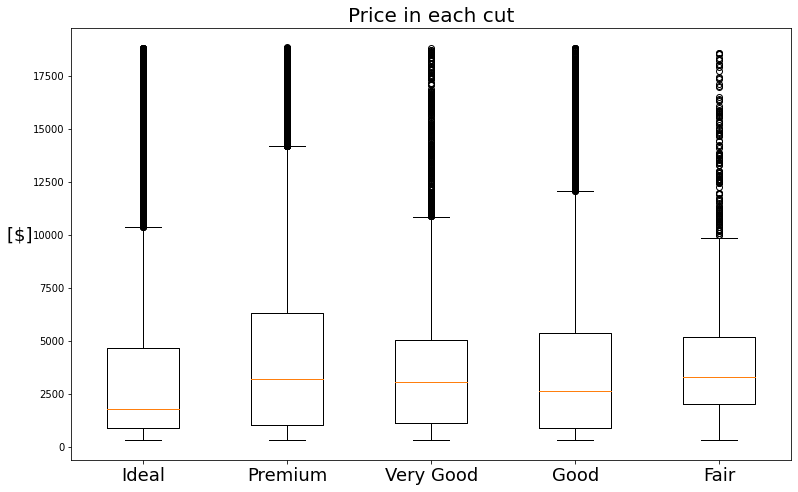

In [28]:
columns = [ideal, premium, good, veryGood, fair]

fig = plt.figure(figsize =(5, 3))

# Creating axes instance
ax = fig.add_axes([0, 0, 2, 2])

# Creating plot
bp = ax.boxplot(columns)
plt.xticks([1, 2, 3, 4, 5], ["Ideal", "Premium", "Very Good", "Good", "Fair"], fontsize = 18)
plt.ylabel('[$]   ', fontsize = 18, rotation = 0)

plt.title('Price in each cut', fontsize = 20)

# show plot
plt.show()

### Seaborn Boxplot

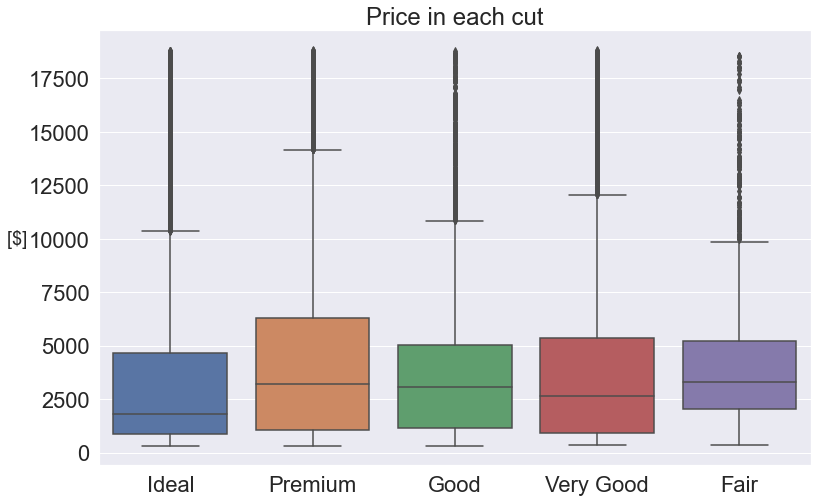

In [29]:
#define figure size
sns.set(rc={"figure.figsize":(12.75, 8)}) 

# #increase font size of all elements
sns.set(font_scale=2)

sns.boxplot(x='cut', y='price', data=df).set(title='Price in each cut')
plt.ylabel('[$]   ', fontsize = 18, rotation = 0)
plt.xlabel('')
plt.show()

## Findings
- The modus of price of the Ideal cut is the lowest of the modus of price of the other cuts.
- The modus of the price of the Fair cut is the highest of the modus of the price of the other cuts.
- The IQR (middle 50% cases) of the price of the Fair cut is the smallest compared to the IQR of the other cuts.
- The IQR (middle 50% cases) of the price of the Premium cut is the biggest compared to the IQR of the other cuts.
- All the diamond cuts have their price maximum of approximately at the same level.

### **7.**
**(8 Points)** Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

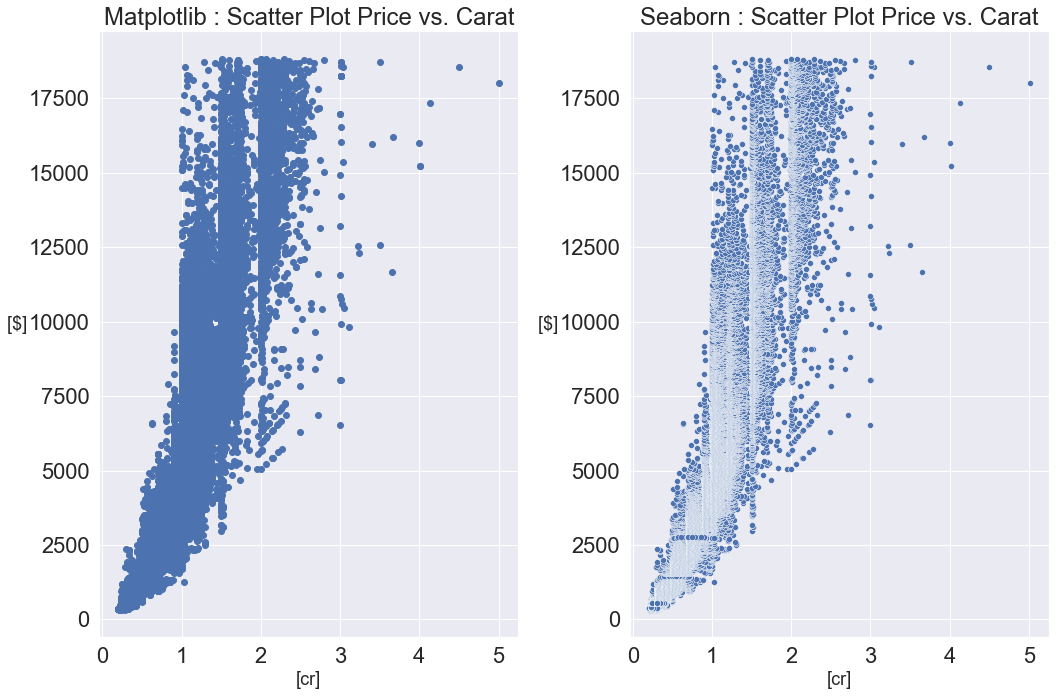

In [30]:
#define figure size
plt.figure(figsize = (15, 10))

# Left plot
plt.subplot(1, 2, 1)
plt.scatter(df['carat'], df['price'])
plt.ylabel('[$]   ', fontsize = 18, rotation = 0)
plt.xlabel('[cr]', fontsize = 18)
plt.title('Matplotlib : Scatter Plot Price vs. Carat')

# Right plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='carat', y='price')
plt.ylabel('[$]   ', fontsize = 18, rotation = 0)
plt.xlabel('[cr]', fontsize = 18)
plt.title('Seaborn : Scatter Plot Price vs. Carat')


# using padding
plt.tight_layout(pad=0.8)
  
plt.show()

## Findings
- The price of the diamonds increases approximately exponentially with the increase in weight (carats).
- The price of diamonds has a very high variance (approx. $1,500 - $18,000) approximately from the weight of one carat.
- The variance begins to decrease (approx. $12,000 - $18,000) above approximately the weight of 3.5 carats.

## **Part 4:**
**Conclusion (10 Points)** – A brief, concise narrative explaining your conclusions.

In conclusion, the EDA shows an uneven (skewed) distribution of the price and weight (carats) of diamonds. Other attributes such as depth, table, x, y, and z generally have a bell-shaped distribution. Furthermore, the carat and price distributions have relatively large variances relative to the variances of the other distributions. This phenomenon is the cause of a relatively large number of outliers. The most frequent categorical attributes are Ideal for diamond cut, G for color, SI1 for clarity. In the area of price distribution based on diamond cuts, it appears that the mode of the price of ideal cuts is lower than the mode of prices of the last diamond cuts. On the opposite end, there is the mode of Fair cut prices. The IQR (middle 50% cases) of the price of the Premium cut is the biggest and the Fair cut is the smallest compared to the other IQRs. Another insight is that all diamond cuts have their price maxima at approximately the same price level. In general, it can be argued that the price of diamonds increases exponentially with the increase in their weight (carats). The price of diamonds has a large variability even when they are the same weight.

# **References**
**(5 Points)** - Be sure to include proper citations for any references you may have relied on as part of your work.

-  William McKinney, *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython 2nd Edition*, (O'Reilly Media, 2017), pg. 253 : CHAPTER 9 Plotting and Visualization

- https://engineeringfordatascience.com/posts/matplotlib_subplots/

- https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/

- https://datavizpyr.com/how-to-add-a-mean-median-line-to-a-seaborn-displot/

- https://stackoverflow.com/questions/36107946/elegant-way-to-get-all-categorical-columns-in-pandas

- https://www.geeksforgeeks.org/how-to-extract-the-value-names-and-counts-from-value_counts-in-pandas/